# 기초 회귀 분석  
* 단순 회귀

[공공데이터 포털](https://www.data.go.kr/index.do)  
[국가데이터 포털](http://kosis.kr/index/index.do;jsessionid=scj4MBBcLckIlSdvyCGUz5NbVjZw1iImrtabzwXaOV87aNPoV2evvfX059UazXWa.STAT_WAS2_servlet_engine1)   
[통계청](http://kostat.go.kr/portal/korea/index.action)   
[Kaggle Datasets](https://www.kaggle.com/datasets)

## 기초 회귀  분석: 키와 몸무게의 상관 관계

In [1]:
# 필요한 library 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

### 데이터 불러오기 및 전처리

In [3]:
df = pd.read_csv('./student.csv', engine = 'python', encoding= 'cp949')

In [4]:
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9686 non-null   object 
 1   최종가중치       9686 non-null   float64
 2   학교ID        9686 non-null   object 
 3   도시규모        9686 non-null   object 
 4   도시규모별분석용    9686 non-null   object 
 5   학년도         9686 non-null   int64  
 6   광역시도        9686 non-null   object 
 7   시도별         9686 non-null   object 
 8   학교급별        9686 non-null   int64  
 9   학교명         9686 non-null   object 
 10  공학여부        9686 non-null   object 
 11  학년          9686 non-null   int64  
 12  반           9686 non-null   int64  
 13  성별          9686 non-null   object 
 14  건강검진일       9686 non-null   int64  
 15  키           9686 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [6]:
df.describe()

,최종가중치,학년도,학교급별,학년,반,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9.686000e+03,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,2.015047e+07,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,1.014788e+02,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,2.015023e+07,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,2.015041e+07,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,2.015043e+07,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,2.015051e+07,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,2.015091e+07,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


키와 몸무게만을 사용할 것이기 때문에 두 변수만을 따로 사용하겠습니다. 

In [7]:
data = df.loc[:,['키','몸무게']]

In [8]:
data.head()

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


In [9]:
# null 값 확인
data.isnull().sum()

키      0
몸무게    4
dtype: int64

In [10]:
# inplace = True 
data.dropna(inplace=True)
print(data.isnull().sum())

키      0
몸무게    0
dtype: int64


In [11]:
height = data['키'] # 키
weight = data['몸무게'] # 몸무게

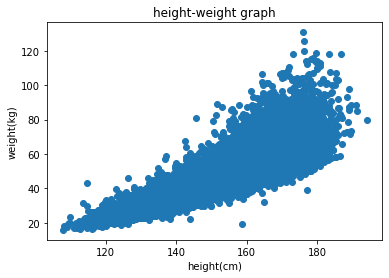

In [12]:
plt.plot(height, weight, 'o')
plt.title('height-weight graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Linear regression using statsmodels.api

In [13]:
import statsmodels.api as sm

In [14]:
# ols 사용
# ordinary least squares

# stats 모델에서 bias를 사용하려면 constant를 추가해서 모델링을 해줘야 함.
height1 = sm.add_constant(height, has_constant='add')
height1.head(5)

,const,키
0,1.0,125.8
1,1.0,124.3
2,1.0,119.2
3,1.0,115.0
4,1.0,120.0


In [15]:
lm = sm.OLS(weight, height1)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    몸무게   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:28:29   Log-Likelihood:                -35036.
No. Observations:                9682   AIC:                         7.008e+04
Df Residuals:                    9680   BIC:                         7.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.8267      0.840    -97.388      0.000     -83.474     -80.180
키              0.8542      0.005    158.088      0.000       0.844       0.865
==============================================================================
Omnibus:                     2123.133   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5777.039
Skew:                           1.169   Prob(JB):                         0.00
Kurtosis:                       5.975   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결과 해석   
1. $weight = -81.8267 + 0.8542 \times height$   
2. $R^2 = 0.72$   
3. $p-values = 0$

### Linear regression using scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

In [16]:
rl = LinearRegression()

In [17]:
try:
    rl.fit(height, weight) 
except:
    print('모델 학습에 에러 발생!')
    print(height.values.shape)

모델 학습에 에러 발생!
(9682,)


In [18]:
# X데이터가 2차원 array형태여야 하기 때문에 height의 차원을 추가해줌.
# np.newaxis 사용
# 또는 .reshape(-1,1) 사용

rl.fit(height.values[:,np.newaxis], weight) 
# 또는 rl.fit(height.to_numpy()[:,np.newaxis],weight)
# 또는 rl.fit(height.values.reshape(-1,1), weight) 사용 가능.

LinearRegression()

In [19]:
print('기울기: ',rl.coef_[0])
print('절편:', rl.intercept_)

기울기:  0.8542323795602206
절편: -81.8266925268558


In [20]:
rl.predict([[180]])
# 키가 180cm인 사람 몸무게 예측

array([71.93513579])

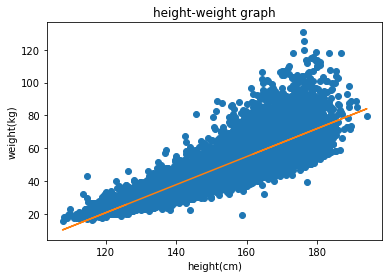

In [21]:
plt.plot(height, weight, 'o')
plt.plot(height,rl.predict(height.values.reshape(-1,1)))
plt.title('height-weight graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

### 결정 계수 $R^2$   
$R^2 = 1-{SS_{RES} \over SS_{TOT}}=1-{\Sigma_{i}(y_{i}-\hat{y_{i}})^{2} \over \Sigma_{i}(y_{i}-\bar{y_{i}})^{2} }$

In [22]:
predict = rl.predict(height.values.reshape(-1,1))
r2 = 1 - ((weight - predict)**2).sum() / ((weight - weight.mean())**2).sum()
print(f'R^2: {r2:.4f}')

R^2: 0.7208


### MSE (Mean Squared Error)

$MSE = {1 \over n} \Sigma_{i}^{n} (y_{i}-\hat{y_{i}})^{2}$   
$n$ : the number of observations in the test set   
$y_{i}$ : actual values   
$\hat{y_{i}}$ : predicted values     


In [26]:
from sklearn.metrics import mean_squared_error

In [23]:
mse = np.mean((weight - predict)**2)
print(f'MSE: {mse:.4f}')

MSE: 81.3998


In [27]:
# library 사용
mse = mean_squared_error(weight, predict)
print(f'MSE: {mse:.4f}')

MSE: 81.3998


## 실습: 보스턴 집값 예측 모델

#### 주택당 방 수(RM) 데이터를 가지고 집값 예측하는 선형 회귀모형 만들어보기
- 기울기, 절편 구하기
- $R^2$, $MSE$ 구하기

### 데이터 설명
타겟 데이터   
1978 보스턴 주택 가격   
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)   

|특징 데이터||
|------|---|
|CRIM|범죄율|
|INDUS|비소매상업지역 면적 비율|
|NOX|일산화질소 농도|
|RM|주택당 방 수|
|LSTAT|인구 중 하위 계층 비율|
|B|인구 중 흑인 비율|
|PTRAT|학생/교사 비율|
|ZN|25,000 평방피트를 초과 거주지역 비율|
|CHAS|찰스강의 경계에 위치한 경우는 1, 아니면 0|
|AGE|1940년 이전에 건축된 주택의 비율|
|RAD|방사형 고속도로까지의 거리|
|DIS|직업센터의 거리|
|TAX|재산세율|
  

In [24]:
boston = pd.read_csv("./Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 Target 사용 
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
## Hint: y = boston[['Target']], X= boston[['RM']]

In [ ]:
# 단순 선형 회귀 모델 생성 및 학습

In [ ]:
# 기울기 및 절편 확인

In [ ]:
# R^2 및 MSE 확인

### 실습 가이드 라인

In [28]:
# 실습 가이드 라인 1
# sklearn 사용하는 경우

# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 PRICE 사용
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
price = boston[['Target']]
RM = boston[['RM']]

# 단순 선형 회귀 모델 생성 및 학습
rl = LinearRegression()
rl.fit(RM, price)

# 기울기 및 절편 확인
print(f'기울기: {rl.coef_[0][0]:.4f}')
print(f'절편: {rl.intercept_[0]:.4f}' )

# R^2 및 MSE 확인
price_hat = rl.predict(RM)
print(f'R^2: {rl.score(RM, price):.4f}')
print(f'MSE: {mean_squared_error(price,price_hat):.4f}')

기울기: 9.1021
절편: -34.6706
R^2: 0.4835
MSE: 43.6006


In [29]:
# 실습 가이드 라인 2
# statsmodel.api 를 사용하는 경우

# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 PRICE 사용
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
price = boston[['Target']]
RM = boston[['RM']]
RM1 = sm.add_constant(RM, has_constant= 'add')
print(RM1.head(5))

# 단순 선형 회귀 모델 생성 및 학습
lm = sm.OLS(price, RM1)
results = lm.fit()
print(results.summary())

   const     RM
0    1.0  6.575
1    1.0  6.421
2    1.0  7.185
3    1.0  6.998
4    1.0  7.147
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        10:41:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## 생각해볼 만한 것

'학습 데이터'가 아닌 '새로운 데이터'에 대해서도 모델이 좋은 설명력을 가질까?    
Generalization performance

## Train_test_set_split & evaluation

![split](Image/ee.png)

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
# Boston 데이터를 그대로 사용.

# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 PRICE 사용
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
y = boston[['Target']]
X = boston[['RM']]

# 이 때 모델의 generalization performance 를 확인하기 위해 train-test split을 해줌.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [34]:
# test data 셋 비율 확인
X_test.shape[0]/X.shape[0]

0.30039525691699603

In [40]:
# 단순 선형 회귀 모델 생성 및 학습
rl = LinearRegression()
rl.fit(X_train, y_train)

# 기울기 및 절편 확인
print(f'기울기: {rl.coef_[0][0]:.4f}')
print(f'절편: {rl.intercept_[0]:.4f}' )

# R^2 및 MSE 확인
price_hat = rl.predict(X_train)
print(f'R^2: for the training data {rl.score(X_train, y_train):.4f}')
print(f'MSE for the training data: {mean_squared_error(y_train,price_hat):.4f}')

기울기: 9.3113
절편: -35.9943
R^2: 0.5026
MSE: 42.1577


In [41]:
# R^2 및 MSE 확인
price_hat = rl.predict(X_test)
print(f'R^2: for the test data {rl.score(X_test, y_test):.4f}')
print(f'MSE for the test data: {mean_squared_error(y_test,price_hat):.4f}')

R^2: for the test data 0.4351
MSE for the test data: 47.0330


## 생각해볼 만한 것

단 한 번의 'split' 으로 generalization performance 를 평가하는 것이 합리적인까?

## Cross validation
* K-fold validation

In [43]:
from sklearn.model_selection import KFold

![CV](Image/dd.png)

In [44]:
# cross validation 예제
idx = np.arange(10)
kf2 = KFold(n_splits=5, shuffle=False)
for fold,(idx_train, idx_test) in enumerate(kf2.split(idx)):
    print('fold:',fold)
    print("idx train:",idx_train, "idx test:",idx_test)

fold: 0
idx train: [2 3 4 5 6 7 8 9] idx test: [0 1]
fold: 1
idx train: [0 1 4 5 6 7 8 9] idx test: [2 3]
fold: 2
idx train: [0 1 2 3 6 7 8 9] idx test: [4 5]
fold: 3
idx train: [0 1 2 3 4 5 8 9] idx test: [6 7]
fold: 4
idx train: [0 1 2 3 4 5 6 7] idx test: [8 9]


### 직접 cross validation 활용하기 
* 함수 짜기

In [54]:
# 직접 cross validation 활용하기
def my_cv(model, X, y, n_splits:int, shuffle = True):
    
    # performance 저장용
    perf = {'MSE_training':[], 'MSE_test':[], 'R2_train':[],'R2_test':[]}
    idx = X.index
    folds = KFold(n_splits=n_splits, shuffle= shuffle)
    for idx_train, idx_test in folds.split(idx):
        X_train = X.loc[idx_train,:]
        X_test = X.loc[idx_test, :]
        y_train = y.loc[idx_train]
        y_test = y.loc[idx_test]
        
        model.fit(X_train, y_train)
        # performance 계산
        mse_train = mean_squared_error(y_train, model.predict(X_train))
        mse_test = mean_squared_error(y_test, model.predict(X_test))
        r2_train = model.score(X_train, y_train)
        r2_test = model.score(X_test, y_test)
        
        # performance list에 저장
        perf['MSE_training'].append(mse_train)
        perf['MSE_test'].append(mse_test)
        perf['R2_train'].append(r2_train)
        perf['R2_test'].append(r2_test)
        
    return perf
    

In [55]:
# Boston data 에 적용해보기

# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 PRICE 사용
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
y = boston[['Target']]
X = boston[['RM']]

model = LinearRegression()

perf = my_cv(model, X, y, n_splits= 5)

In [56]:
perf

{'MSE_training': [37.27423719476749,
  46.29227408672339,
  47.566299362327044,
  42.56239816875466,
  43.61249048594266],
 'MSE_test': [70.20983731783214,
  33.461266092568714,
  27.895752917819944,
  47.9383109661788,
  44.460210823316025],
 'R2_train': [0.5459780795202143,
  0.4964569087318986,
  0.45292557244145715,
  0.48740847103810914,
  0.43836576530116034],
 'R2_test': [0.2434667155635959,
  0.323196764236405,
  0.6217811536288379,
  0.465082887468367,
  0.5940640963883795]}

In [57]:
# 좀 더 편하게 보기 위해 pandas 사용
pd_perf = pd.DataFrame(perf)
pd_perf

,MSE_training,MSE_test,R2_train,R2_test
0,37.274237,70.209837,0.545978,0.243467
1,46.292274,33.461266,0.496457,0.323197
2,47.566299,27.895753,0.452926,0.621781
3,42.562398,47.938311,0.487408,0.465083
4,43.612490,44.460211,0.438366,0.594064


In [59]:
# 평균과 표준 편차로서 fold 결과 분석
pd_perf.mean(axis= 0)

MSE_training    43.461540
MSE_test        44.793076
R2_train         0.484227
R2_test          0.449518
dtype: float64

In [60]:
pd_perf.std(axis= 0)

MSE_training     3.999252
MSE_test        16.355003
R2_train         0.042000
R2_test          0.165246
dtype: float64

### 패키지 사용도 가능

In [61]:
from sklearn.model_selection import cross_val_score

In [ ]:
?cross_val_score

In [67]:
score = cross_val_score(rl, X, y, cv=5 , scoring='neg_mean_squared_error')
print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [ -10.11581024  -33.25013827  -39.73491255 -106.6526283   -73.84557039]
cross validataion average score:  -52.71981195000427


### 실습: Boston 데이터셋에 대해서 cross validation 3번 반복 했을 때 test error 계산하기

In [ ]:
# Target 및 independent variable 셋팅
# Response variable (Dependent variable, 종속 변수) y 는 PRICE 사용
# Explanatory variable (Independent variable, 독립 변수) X 는 RM (주택 당 방 수) 사용
y = boston[['Target']]
X = boston[['RM']]

model = LinearRegression()

### 실습 가이드 라인

In [69]:
# 실습 가이드
# cv = 3
score = cross_val_score(rl, X, y, cv=3 , scoring='neg_mean_squared_error')

print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [ -15.65075353  -58.57889782 -114.55076324]
cross validataion average score:  -62.92680486497932


---

## 변수 변환

### 필요성

![CV](Image/non_linear.png)

선형 그래프로는 비선형 그래프를 설명하지 못함.

In [74]:
# 예시를 들고자 로그 데이터를 생성함.
X = np.linspace(0.1, 5, num = 100) # 구간 (0.1, 5)에서 총 100개의 point를 뽑음 (균일 간격)
y = np.log(X) + np.random.normal() # y =log(X) + Normal(0,1)

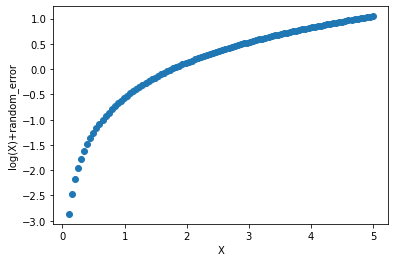

In [77]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('log(X)+random_error')
plt.show()

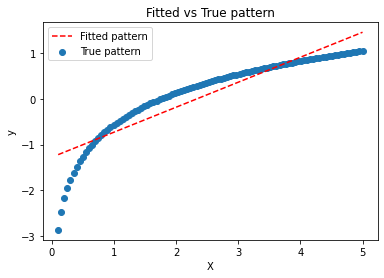

In [84]:
# linear regression fitting 결과 시각화
lr = LinearRegression()
lr.fit(X[:,np.newaxis],y)
fitted_y =lr.predict(X[:,np.newaxis])


plt.title('Fitted vs True pattern')
plt.scatter(X, y, label = 'True pattern')
plt.plot(X, fitted_y,'r--', label = 'Fitted pattern')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

$y = log({X\beta})$ 관계라는 것을 알기 때문에, $e^{y} = X\beta$ 에 대해 모델링한다면?

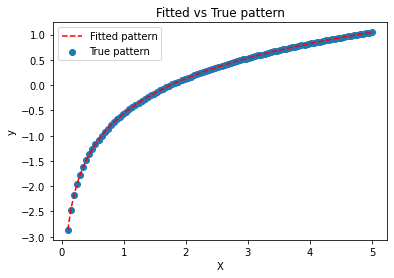

In [85]:
y_transformed = np.exp(y)

lr = LinearRegression()
lr.fit(X[:,np.newaxis],y_transformed)
fitted_y = np.log(lr.predict(X[:,np.newaxis]))


plt.title('Fitted vs True pattern')
plt.scatter(X, y, label = 'True pattern')
plt.plot(X, fitted_y,'r--', label = 'Fitted pattern')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()